Problem Statements : Movie Recommendation

Nama : Muhammad Iqbal Pradipta

# **Install Package**

In [1]:
!pip install scikit-surprise


# **Import Package**

Import package untuk proses visualisasi data dan development model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import scipy.stats as stats
import json
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **Load and Check Dataset**

**Menghubungkan Google Drive**

Pada langkah pertama menghubungkan Google Drive ke lingkungan Google Colab untuk mengakses dataset yang diperlukan.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Menentukan path file**

Menentukan path atau lokasi file yang akan diakses di Google Drive ketika menggunakan Google Colab

In [4]:
movies = '/content/drive/My Drive/ColabNotebooks/dicoding_ai/machine_learning_terapan/tmdb_movies.csv'
credits = '/content/drive/My Drive/ColabNotebooks/dicoding_ai/machine_learning_terapan/tmdb_credits.csv'
ratings_small = '/content/drive/My Drive/ColabNotebooks/dicoding_ai/machine_learning_terapan/ratings_small.csv'


**Baca File .csv**

Membaca file csv agar menyesuaikan ke pandas Dataframe

In [5]:
# Load the datasets
movies_df = pd.read_csv(movies)
credits_df = pd.read_csv(credits)
ratings_small_df = pd.read_csv(ratings_small)

# Print the DataFrames
print("Data Movies")
movies_df.head()

Data Movies


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
print("\nData Credits")
credits_df.head()


Data Credits


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
ratings_small_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**Melihat info dari dataset movies, ratings dan credits**

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [10]:
ratings_small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**Melihat describe dari masing-masing dataset**

In [11]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
credits_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [13]:
ratings_small_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


**Melihat Jumlah Baris dan Jumlah Kolom di dataset movies dan credits**

In [14]:
rows, cols = movies_df.shape
print(f"Jumlah baris dataset movies: {rows}")
print(f"Jumlah kolom movies: {cols}")

Jumlah baris dataset movies: 4803
Jumlah kolom movies: 20


In [15]:
rows, cols = credits_df.shape
print(f"Jumlah baris dataset credits: {rows}")
print(f"Jumlah kolom credits: {cols}")

Jumlah baris dataset credits: 4803
Jumlah kolom credits: 4


In [16]:
rows, cols = ratings_small_df.shape
print(f"Jumlah baris dataset ratings_small: {rows}")
print(f"Jumlah kolom ratings_small: {cols}")

Jumlah baris dataset ratings_small: 100004
Jumlah kolom ratings_small: 4


**Melihat jumlah nilai null di setiap kolom**

In [17]:
null_values_movies = movies_df.isnull().sum()
null_values_movies

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [18]:
null_values_credits = credits_df.isnull().sum()
null_values_credits

,0
movie_id,0
title,0
cast,0
crew,0


In [19]:
null_values_ratings_small = ratings_small_df.isnull().sum()
null_values_ratings_small

,0
userId,0
movieId,0
rating,0
timestamp,0


# **Data Preprocessing**

**Mengisi nilai yang null**




In [20]:
movies_df['runtime'].head()

,runtime
0,162.0
1,169.0
2,148.0
3,165.0
4,132.0


**Mengisi nilai null fitur runtime dengan mean**

In [21]:
runtime_mean = movies_df['runtime'].mean()
movies_df['runtime'] = movies_df['runtime'].fillna(runtime_mean)

In [22]:
movies_df['tagline'] = movies_df['tagline'].fillna(object())
movies_df['homepage'] = movies_df['homepage'].fillna(object())
movies_df['overview'] = movies_df['tagline'].fillna(object())
movies_df['release_date'] = movies_df['release_date'].fillna(object())

**Cek kembali apakah masih ada fitur yang null**

In [23]:
null_values_movies = movies_df.isnull().sum()
null_values_movies

,0
budget,0
genres,0
homepage,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0


**Melihat top 10 Film Terbaik**

In [24]:
# Langkah 1: Tentukan rata-rata dari seluruh film dan batas minimum jumlah vote
C = movies_df['vote_average'].mean()  # Rata-rata keseluruhan dari rating
m = movies_df['vote_count'].quantile(0.90)  # 90th percentile dari jumlah vote (film yang berada di top 10%)

# Langkah 2: Filter hanya film yang memiliki jumlah vote di atas m
qualified_movies = movies_df[movies_df['vote_count'] >= m]

# Langkah 3: Menghitung Weighted Rating menggunakan formula WR
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Menghitung weighted rating berdasarkan formula WR
    return (v / (v + m) * R) + (m / (v + m) * C)

qualified_movies = movies_df[movies_df['vote_count'] >= m].copy()

# Menghitung Weighted Rating dan menetapkannya pada kolom 'score'
qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis=1)

# Melanjutkan proses sorting dan pengambilan 10 film terbaik
top_movies = qualified_movies.sort_values('score', ascending=False)

# Ambil 10 film terbaik
top_10_movies = top_movies[['title', 'vote_average', 'vote_count', 'score']].head(10)


# Menampilkan 10 film terbaik
top_10_movies


,title,vote_average,vote_count,score
1881,The Shawshank Redemption,8.5,8205,8.059258
662,Fight Club,8.3,9413,7.939256
65,The Dark Knight,8.2,12002,7.920020
3232,Pulp Fiction,8.3,8428,7.904645
96,Inception,8.1,13752,7.863239
3337,The Godfather,8.4,5893,7.851236
95,Interstellar,8.1,10867,7.809479
809,Forrest Gump,8.2,7927,7.803188
329,The Lord of the Rings: The Return of the King,8.1,8064,7.727243
1990,The Empire Strikes Back,8.2,5879,7.697884


In [25]:
# Mengurutkan DataFrame berdasarkan kolom 'popularity'
top_popular_movies = movies_df.sort_values('popularity', ascending=False)

top_10_popular_movies = top_popular_movies[['title', 'popularity', 'vote_average', 'vote_count',
                                            'production_companies', 'production_countries', 'release_date']].head(10)

# Menampilkan tabel film dengan popularity terbanyak
top_10_popular_movies

,title,popularity,vote_average,vote_count,production_companies,production_countries,release_date
546,Minions,875.581305,6.4,4571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17
95,Interstellar,724.247784,8.1,10867,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05
788,Deadpool,514.569956,7.4,10995,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09
94,Guardians of the Galaxy,481.098624,7.9,9742,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30
127,Mad Max: Fury Road,434.278564,7.2,9427,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13
28,Jurassic World,418.708552,6.5,8662,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,7.5,6985,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-07-09
82,Dawn of the Planet of the Apes,243.791743,7.3,4410,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-06-26
200,The Hunger Games: Mockingjay - Part 1,206.227151,6.6,5584,"[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-11-18
88,Big Hero 6,203.734590,7.8,6135,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-24


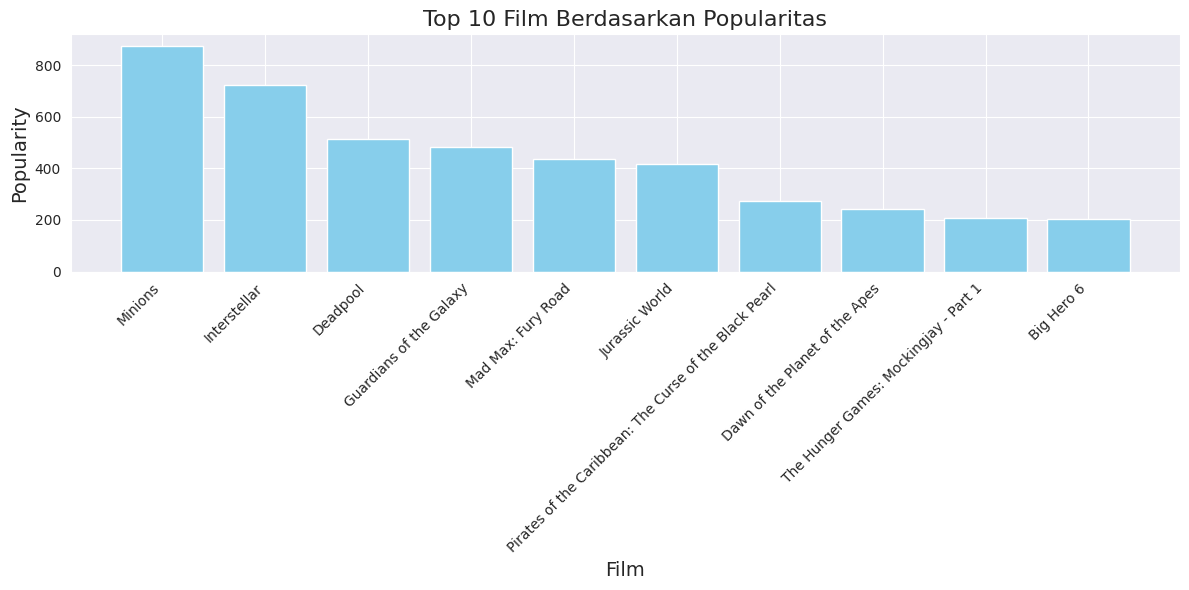

In [26]:
# Membuat plot bar dengan nama film di sumbu X dan popularitas di sumbu Y
plt.figure(figsize=(12,6))
plt.bar(top_10_popular_movies['title'], top_10_popular_movies['popularity'], color='skyblue')

# Menambahkan judul dan label
plt.title('Top 10 Film Berdasarkan Popularitas', fontsize=16)
plt.xlabel('Film', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

# Memutar label nama film di sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Fungsi extract_production_countries bertujuan untuk mengubah string JSON yang terdapat dalam kolom production_countries menjadi list Python yang lebih mudah dipahami.**

In [27]:
def extract_production_countries(countries):
    try:
        countries_list = json.loads(countries)
        return ', '.join([country['name'] for country in countries_list])
    except (json.JSONDecodeError, TypeError):
        return ''

movies_df['production_countries_full'] = movies_df['production_countries'].apply(extract_production_countries)

movies_df[['title', 'production_countries_full']].head(10)



,title,production_countries_full
0,Avatar,"United States of America, United Kingdom"
1,Pirates of the Caribbean: At World's End,United States of America
2,Spectre,"United Kingdom, United States of America"
3,The Dark Knight Rises,United States of America
4,John Carter,United States of America
5,Spider-Man 3,United States of America
6,Tangled,United States of America
7,Avengers: Age of Ultron,United States of America
8,Harry Potter and the Half-Blood Prince,"United Kingdom, United States of America"
9,Batman v Superman: Dawn of Justice,United States of America


**Fungsi extract_production_companies bertujuan untuk mengubah string JSON yang terdapat dalam kolom production_companies menjadi list Python yang lebih mudah dipahami.**

In [28]:
def extract_production_companies(companies):
    try:
        companies_list = json.loads(companies)
        return ', '.join([company['name'] for company in companies_list])
    except (json.JSONDecodeError, TypeError):
        return ''

movies_df['production_companies_full'] = movies_df['production_companies'].apply(extract_production_companies)

movies_df[['title', 'production_companies_full']].head(10)


,title,production_companies_full
0,Avatar,"Ingenious Film Partners, Twentieth Century Fox..."
1,Pirates of the Caribbean: At World's End,"Walt Disney Pictures, Jerry Bruckheimer Films,..."
2,Spectre,"Columbia Pictures, Danjaq, B24"
3,The Dark Knight Rises,"Legendary Pictures, Warner Bros., DC Entertain..."
4,John Carter,Walt Disney Pictures
5,Spider-Man 3,"Columbia Pictures, Laura Ziskin Productions, M..."
6,Tangled,"Walt Disney Pictures, Walt Disney Animation St..."
7,Avengers: Age of Ultron,"Marvel Studios, Prime Focus, Revolution Sun St..."
8,Harry Potter and the Half-Blood Prince,"Warner Bros., Heyday Films"
9,Batman v Superman: Dawn of Justice,"DC Comics, Atlas Entertainment, Warner Bros., ..."


**Fungsi extract_names digunakan untuk mengekstrak nama-nama aktor dari string JSON yang terdapat dalam kolom cast di DataFrame credits_df.**

In [29]:
def extract_names(cast_json):
    cast_list = ast.literal_eval(cast_json)
    names = [cast['name'] for cast in cast_list]
    return ', '.join(names)

credits_df['cast_names'] = credits_df['cast'].apply(extract_names)


In [30]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_id    4803 non-null   int64 
 1   title       4803 non-null   object
 2   cast        4803 non-null   object
 3   crew        4803 non-null   object
 4   cast_names  4803 non-null   object
dtypes: int64(1), object(4)
memory usage: 187.7+ KB


In [31]:
# Fungsi untuk mengubah JSON string menjadi list of dictionaries
def convert_genres(json_str):
    try:
        # Parsing string JSON menjadi list of dictionaries
        return json.loads(json_str)
    except ValueError:
        # Jika parsing gagal, kembalikan list kosong
        return []

# Fungsi untuk mengekstrak nama genre dari list of dictionaries
def extract_genre_names(genres):
    # Pastikan data adalah list sebelum melakukan ekstraksi
    if isinstance(genres, list):
        return [genre['name'] for genre in genres if 'name' in genre]
    return []  # Kembalikan list kosong jika bukan list

# Menerapkan fungsi di seluruh kolom 'genres'
movies_df['genres_list'] = movies_df['genres'].apply(convert_genres)
movies_df['genre_names'] = movies_df['genres_list'].apply(extract_genre_names)

# Menampilkan hasil akhir
movies_df[['title', 'genre_names', 'genres_list']].head()


,title,genre_names,genres_list
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Spectre,"[Action, Adventure, Crime]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,John Carter,"[Action, Adventure, Science Fiction]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [32]:
movies_df['overview'].head()

,overview
0,Enter the World of Pandora.
1,"At the end of the world, the adventure begins."
2,A Plan No One Escapes
3,The Legend Ends
4,"Lost in our world, found in another."


In [33]:
# Cek tipe data setiap elemen di kolom 'overview'
overview_types = movies_df['overview'].apply(type)
print(overview_types.value_counts())

# Mengganti nilai yang bertipe 'object' dengan string kosong
movies_df['overview'] = movies_df['overview'].apply(lambda x: x if isinstance(x, str) else '')

# Verifikasi tipe data setelah perubahan
overview_types = movies_df['overview'].apply(type)
overview_types.value_counts()

overview
<class 'str'>       3959
<class 'object'>     844
Name: count, dtype: int64


,count
overview,
<class 'str'>,4803


In [34]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        # Mengubah teks menjadi huruf kecil
        text = text.lower()
        # Menghapus angka dan karakter khusus
        text = re.sub(r'[^a-z\s]', '', text)
    return text

# Terapkan fungsi bersih pada kolom overview
movies_df['cleaned_overview'] = movies_df['overview'].apply(clean_text)

# Menghapus baris dengan cleaned_overview kosong
movies_df = movies_df[movies_df['cleaned_overview'].str.strip() != '']

movies_df['cleaned_overview'].head()

,cleaned_overview
0,enter the world of pandora
1,at the end of the world the adventure begins
2,a plan no one escapes
3,the legend ends
4,lost in our world found in another


In [35]:
# Misalkan credits_df dan movies_df adalah DataFrame yang sudah Anda buat

# Pertama, kita perlu mengekstrak nama aktor dari 'cast' dalam credits_df
def extract_cast_names(cast):
    # Pastikan cast bukan NaN atau kosong
    if isinstance(cast, str) and cast != "[]":
        cast_list = eval(cast)  # Mengubah string JSON menjadi list of dictionaries
        return [member['name'] for member in cast_list]  # Ambil nama dari setiap anggota
    return []

# Terapkan fungsi untuk mengekstrak nama cast
credits_df['cast_names'] = credits_df['cast'].apply(extract_cast_names)

# Gabungkan credits_df dan movies_df berdasarkan movie_id dan id
merged_df = pd.merge(movies_df, credits_df[['movie_id', 'crew', 'cast_names']],
                     left_on='id', right_on='movie_id', how='left')

# Tampilkan kolom yang ada di merged_df untuk debugging
print("Kolom di merged_df:", merged_df.columns)

# Pilih kolom yang relevan dari merged_df
final_df = merged_df[['id', 'title', 'keywords', 'budget', 'genre_names',
                       'cleaned_overview', 'popularity',
                       'production_companies_full',
                       'production_countries_full', 'revenue',
                       'status', 'vote_average', 'vote_count',
                       'crew', 'cast_names']]


Kolom di merged_df: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_countries_full', 'production_companies_full',
       'genres_list', 'genre_names', 'cleaned_overview', 'movie_id', 'crew',
       'cast_names'],
      dtype='object')


In [36]:
final_df[['title', 'genre_names', 'cleaned_overview', 'popularity',
                 'production_companies_full', 'production_countries_full',
                 'revenue', 'status', 'vote_average', 'vote_count',
                 ]].head()

,title,genre_names,cleaned_overview,popularity,production_companies_full,production_countries_full,revenue,status,vote_average,vote_count
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",enter the world of pandora,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2787965087,Released,7.2,11800
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",at the end of the world the adventure begins,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,961000000,Released,6.9,4500
2,Spectre,"[Action, Adventure, Crime]",a plan no one escapes,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",880674609,Released,6.3,4466
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",the legend ends,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,1084939099,Released,7.6,9106
4,John Carter,"[Action, Adventure, Science Fiction]",lost in our world found in another,43.926995,Walt Disney Pictures,United States of America,284139100,Released,6.1,2124


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3958 non-null   int64  
 1   title                      3958 non-null   object 
 2   keywords                   3958 non-null   object 
 3   budget                     3958 non-null   int64  
 4   genre_names                3958 non-null   object 
 5   cleaned_overview           3958 non-null   object 
 6   popularity                 3958 non-null   float64
 7   production_companies_full  3958 non-null   object 
 8   production_countries_full  3958 non-null   object 
 9   revenue                    3958 non-null   int64  
 10  status                     3958 non-null   object 
 11  vote_average               3958 non-null   float64
 12  vote_count                 3958 non-null   int64  
 13  crew                       3958 non-null   objec

**Fungsi untuk mengambil nama Director dari kolom crew**

In [38]:
# Fungsi untuk mengekstrak director dari kolom crew
def extract_director(crew):
    # Pastikan crew bukan NaN atau kosong
    if isinstance(crew, str) and crew != "[]":
        crew_list = eval(crew)  # Mengubah string JSON menjadi list of dictionaries
        # Cari anggota crew yang memiliki job sebagai 'Director'
        for member in crew_list:
            if member['job'] == 'Director':
                return member['name']
    return None

# Menggunakan .loc untuk menghindari SettingWithCopyWarning
final_df.loc[:, 'director'] = final_df['crew'].apply(extract_director)

# Lihat 5 baris pertama untuk memastikan data director telah diekstrak dengan benar
final_df.head()


<ipython-input-38-3b7ed2c61310>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:, 'director'] = final_df['crew'].apply(extract_director)


,id,title,keywords,budget,genre_names,cleaned_overview,popularity,production_companies_full,production_countries_full,revenue,status,vote_average,vote_count,crew,cast_names,director
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",enter the world of pandora,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2787965087,Released,7.2,11800,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",300000000,"[Adventure, Fantasy, Action]",at the end of the world the adventure begins,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,961000000,Released,6.9,4500,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",245000000,"[Action, Adventure, Crime]",a plan no one escapes,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",880674609,Released,6.3,4466,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",250000000,"[Action, Crime, Drama, Thriller]",the legend ends,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,1084939099,Released,7.6,9106,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",260000000,"[Action, Adventure, Science Fiction]",lost in our world found in another,43.926995,Walt Disney Pictures,United States of America,284139100,Released,6.1,2124,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


In [39]:
# Menghapus duplikat berdasarkan kolom 'title'
final_df = final_df.drop_duplicates(subset='title', keep='first').reset_index(drop=True)

# Menampilkan DataFrame setelah menghapus duplikat
final_df.head()


,id,title,keywords,budget,genre_names,cleaned_overview,popularity,production_companies_full,production_countries_full,revenue,status,vote_average,vote_count,crew,cast_names,director
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",enter the world of pandora,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2787965087,Released,7.2,11800,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",300000000,"[Adventure, Fantasy, Action]",at the end of the world the adventure begins,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,961000000,Released,6.9,4500,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",245000000,"[Action, Adventure, Crime]",a plan no one escapes,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",880674609,Released,6.3,4466,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",250000000,"[Action, Crime, Drama, Thriller]",the legend ends,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,1084939099,Released,7.6,9106,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",260000000,"[Action, Adventure, Science Fiction]",lost in our world found in another,43.926995,Walt Disney Pictures,United States of America,284139100,Released,6.1,2124,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


**Modelling**

**Fungsi untuk mengambil rekomendasi film berdasarkan cleaned_overview**

In [40]:
tfidf = TfidfVectorizer(stop_words='english')

final_df['cleaned_overview'] = final_df['cleaned_overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(final_df['cleaned_overview'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def recommend_movies(title, cosine_sim=cosine_sim):
    idx = pd.Series(final_df.index, index=final_df['title']).drop_duplicates()

    movie_idx = idx[title]

    sim_scores = list(enumerate(cosine_sim[movie_idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]  # 1:11 karena 0 adalah film itu sendiri

    movie_indices = [i[0] for i in sim_scores]

    return final_df[['title', 'genre_names']].iloc[movie_indices]

recommended_movies = recommend_movies('The Dark Knight Rises')
recommended_movies


,title,genre_names
984,Taken 3,"[Thriller, Action]"
3002,Veer-Zaara,"[Drama, Romance]"
1022,Coyote Ugly,[Comedy]
296,Hercules,"[Action, Adventure]"
2616,Stoker,"[Drama, Horror, Thriller]"
1658,Dark City,"[Mystery, Science Fiction]"
1982,The Black Hole,"[Adventure, Family, Science Fiction, Action]"
138,Pan,"[Adventure, Family, Fantasy]"
1025,From Hell,"[Horror, Mystery, Thriller]"
1019,Coach Carter,[Drama]


**Menampilkan tf-idf**

In [41]:
# Asumsi final_df sudah ada dan memiliki kolom 'cleaned_overview'

# 1. Menggunakan TF-IDF Vectorizer pada cleaned_overview
final_df['cleaned_overview'] = final_df['cleaned_overview'].fillna('')  # Mengisi NaN dengan string kosong
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(final_df['cleaned_overview'])

# 2. Mendapatkan nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# 3. Menghitung skor TF-IDF rata-rata untuk setiap kata
tfidf_array = tfidf_matrix.toarray()
average_tfidf_scores = tfidf_array.mean(axis=0)

# 4. Membuat DataFrame untuk menyimpan kata dan nilai TF-IDF
tfidf_scores_df = pd.DataFrame({
    'word': feature_names,
    'average_tfidf': average_tfidf_scores
})

# 5. Mengurutkan DataFrame berdasarkan nilai TF-IDF
tfidf_scores_df = tfidf_scores_df.sort_values(by='average_tfidf', ascending=False)

# 6. Menampilkan 10 kata teratas berdasarkan nilai TF-IDF
top_tfidf_words = tfidf_scores_df.head(10)
print(top_tfidf_words)


       word  average_tfidf
2096   love       0.018286
2030   life       0.014836
3306  story       0.012618
3504   time       0.011256
3881  world       0.011158
2139    man       0.010973
1889   just       0.009113
1647    hes       0.007696
3777    way       0.007256
2372    new       0.007132


**Cosine Similirity**

In [42]:
tfidf = TfidfVectorizer(stop_words='english')
final_df['cleaned_overview'] = final_df['cleaned_overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(final_df['cleaned_overview'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

idx = pd.Series(final_df.index, index=final_df['title']).drop_duplicates()
movie_idx = idx["The Dark Knight Rises"]

cosine_sim_dark_knight = cosine_sim[movie_idx]

cosine_sim_df = pd.DataFrame({
    'title': final_df['title'],
    'cosine_similarity': cosine_sim_dark_knight
})
cosine_sim_df = cosine_sim_df.sort_values(by='cosine_similarity', ascending=False).head(11)
print(cosine_sim_df.iloc[1:])


               title  cosine_similarity
984          Taken 3           0.747440
3002      Veer-Zaara           0.549093
1022     Coyote Ugly           0.537654
296         Hercules           0.524978
2616          Stoker           0.516975
1658       Dark City           0.491365
1982  The Black Hole           0.464159
138              Pan           0.463130
1025       From Hell           0.443636
1019    Coach Carter           0.443218


**Percobaan rekomendasi film berdarkan director yang sejenis dan menampilkan film apa saja yang dibuat berdasarkan nama director**

In [43]:
# Asumsi final_df sudah ada dan memiliki kolom 'director'

# 1. Menggunakan TF-IDF Vectorizer pada kolom director
final_df['director'] = final_df['director'].fillna('')  # Mengisi NaN dengan string kosong
tfidf_director = TfidfVectorizer(stop_words='english')
tfidf_director_matrix = tfidf_director.fit_transform(final_df['director'])

# 2. Menghitung cosine similarity berdasarkan direktur
cosine_sim_director = cosine_similarity(tfidf_director_matrix, tfidf_director_matrix)

# 3. Membuat fungsi rekomendasi berdasarkan direktur
def recommend_movies_by_director(director_name, cosine_sim=cosine_sim_director):
    # Mendapatkan indeks film yang disutradarai oleh direktur yang dipilih
    idx = final_df[final_df['director'].str.contains(director_name, case=False, na=False)].index.tolist()

    if not idx:
        return f"No movies found for director: {director_name}"

    # Mendapatkan skor kesamaan dari semua film dengan film yang dipilih
    sim_scores = []
    for i in idx:
        sim_scores.extend(list(enumerate(cosine_sim[i])))

    # Mengurutkan film berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil 10 film paling mirip
    sim_scores = sim_scores[1:11]  # 1:11 karena 0 adalah film itu sendiri

    # Mendapatkan indeks film yang mirip
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan judul film yang mirip dan nilai cosine similarity-nya
    result_df = pd.DataFrame({
        'title': final_df['title'].iloc[movie_indices].values,
        'cosine_similarity': [i[1] for i in sim_scores]
    })

    return result_df

# 4. Contoh penggunaan sistem rekomendasi berdasarkan direktur
recommended_movies_director = recommend_movies_by_director('Christopher Nolan')
print(recommended_movies_director)


                   title  cosine_similarity
0        The Dark Knight                1.0
1           Interstellar                1.0
2              Inception                1.0
3          Batman Begins                1.0
4               Insomnia                1.0
5           The Prestige                1.0
6                Memento                1.0
7  The Dark Knight Rises                1.0
8        The Dark Knight                1.0
9           Interstellar                1.0


**Rekomendasi film berdasarkan nama aktor**

In [44]:
# 1. Menyusun kembali nama aktor menjadi string jika cast_names adalah daftar
final_df['cast_names'] = final_df['cast_names'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 2. Menggunakan TF-IDF Vectorizer pada kolom cast_names
tfidf_cast = TfidfVectorizer(stop_words='english')
tfidf_cast_matrix = tfidf_cast.fit_transform(final_df['cast_names'])

# 3. Menghitung cosine similarity berdasarkan aktor
cosine_sim_cast = cosine_similarity(tfidf_cast_matrix, tfidf_cast_matrix)

# 4. Membuat fungsi rekomendasi berdasarkan aktor
def recommend_movies_by_cast(cast_name, cosine_sim=cosine_sim_cast):
    # Menemukan semua film yang dibintangi oleh aktor yang dipilih
    mask = final_df['cast_names'].str.contains(cast_name, case=False, na=False)

    if not mask.any():
        return "Aktor tidak ditemukan."

    # Mengambil indeks film yang sesuai
    movie_indices = final_df[mask].index.tolist()

    # Mendapatkan skor kesamaan dari semua film dengan film yang dipilih
    sim_scores = []
    for idx in movie_indices:
        sim_scores.extend(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil 10 film paling mirip
    sim_scores = sim_scores[1:11]  # 1:11 karena 0 adalah film itu sendiri

    # Mendapatkan indeks film yang mirip
    recommended_indices = [i[0] for i in sim_scores]

    # Mengembalikan judul film yang mirip dan nilai cosine similarity-nya
    result_df = pd.DataFrame({
        'title': final_df['title'].iloc[recommended_indices].values,
        'cosine_similarity': [i[1] for i in sim_scores]
    })

    return result_df

# 5. Contoh penggunaan sistem rekomendasi berdasarkan aktor
recommended_movies_cast = recommend_movies_by_cast('Christian Bale')
print(recommended_movies_cast)


                   title  cosine_similarity
0          The Big Short                1.0
1     Out of the Furnace                1.0
2         Public Enemies                1.0
3            The Fighter                1.0
4            Rescue Dawn                1.0
5  The Dark Knight Rises                1.0
6        The Dark Knight                1.0
7             Pocahontas                1.0
8           3:10 to Yuma                1.0
9            Equilibrium                1.0


In [45]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=final_df['title'], columns=final_df['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(15, axis=1).sample(15, axis=0)

Shape: (3955, 3955)


title,The Rite,Blood and Wine,Nine,Clean,Blue Valentine,Much Ado About Nothing,Eraser,Ironclad,Despicable Me,Hall Pass,Quigley Down Under,Robot & Frank,Ghost Town,The Rise of the Krays,Mongol: The Rise of Genghis Khan
title,,,,,,,,,,,,,,,
Confessions of a Teenage Drama Queen,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
The Final Destination,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Full Frontal,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Original Sin,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
My Own Private Idaho,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Barbershop,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Fast Five,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Glengarry Glen Ross,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Superman IV: The Quest for Peace,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [46]:
# Gabungkan hasil gabungan dengan ratings_df
final_df = pd.merge(ratings_small_df, final_df, left_on='movieId', right_on='id', how='left')

# Pilih kolom yang relevan dari final_df untuk SVD
final_df = final_df[['userId', 'movieId', 'rating', 'title', 'genre_names', 'cast_names']]


**Mengimplementasikan metode rekomendasi berbasis SVD menggunakan pustaka surprise. Setelah melatih model dengan data pelatihan, kode ini mengevaluasi kinerja model menggunakan RMSE sebagai metrik.**

In [47]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Pilih kolom yang dibutuhkan untuk SVD
ratings_for_svd = final_df[['userId', 'movieId', 'rating']]

# Gunakan Reader untuk mengatur skema data
reader = Reader(rating_scale=(0.5, 5.0))

# Konversi data ke dalam format Surprise
data = Dataset.load_from_df(ratings_for_svd, reader)

# Bagi data ke dalam train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Inisialisasi model SVD
svd_model = SVD()

# Latih model
svd_model.fit(trainset)

# Evaluasi model dengan test set
predictions = svd_model.test(testset)
accuracy.rmse(predictions)


RMSE: 0.9031


0.9031210753847525

**Berfungsi untuk memberikan rekomendasi film kepada pengguna berdasarkan model rekomendasi yang telah dilatih**

In [49]:
def get_movie_recommendations(user_id, model, final_df, num_recommendations=10):
    rated_movies = final_df[final_df['userId'] == user_id]['movieId'].tolist()
    all_movie_ids = final_df['movieId'].unique()
    unrated_movies = [movie for movie in all_movie_ids if movie not in rated_movies]

    predictions = []
    for movie_id in unrated_movies:
        predictions.append((movie_id, model.predict(user_id, movie_id).est))

    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    recommended_movie_ids = [pred[0] for pred in predictions[:num_recommendations]]

    recommended_movies = final_df[final_df['movieId'].isin(recommended_movie_ids)]['title'].unique()
    return recommended_movies

recommended_movies = get_movie_recommendations(user_id=3, model=svd_model, final_df=final_df)
cleaned_movie_list = [movie for movie in recommended_movies if isinstance(movie, str)]
print(cleaned_movie_list)


['Beetlejuice', 'Galaxy Quest', 'The Good Thief']
